# KNN MODELLING WITH SMOTE

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3267 entries, 0 to 3266
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   market                3267 non-null   object 
 1   funding_rounds        3267 non-null   float64
 2   founded_month         3267 non-null   float64
 3   founded_year          3267 non-null   float64
 4   seed                  3267 non-null   float64
 5   venture               3267 non-null   float64
 6   equity_crowdfunding   3267 non-null   float64
 7   undisclosed           3267 non-null   float64
 8   convertible_note      3267 non-null   float64
 9   debt_financing        3267 non-null   float64
 10  angel                 3267 non-null   float64
 11  grant                 3267 non-null   float64
 12  private_equity        3267 non-null   float64
 13  secondary_market      3267 non-null   float64
 14  product_crowdfunding  3267 non-null   float64
 15  round_A              

C:\Users\aa3-adebayo\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)



Classification Report:
               precision    recall  f1-score   support

           0      0.614     0.680     0.645       306
           1      0.689     0.624     0.655       348

    accuracy                          0.650       654
   macro avg      0.651     0.652     0.650       654
weighted avg      0.654     0.650     0.650       654


Confusion Matrix:
 [[208  98]
 [131 217]]


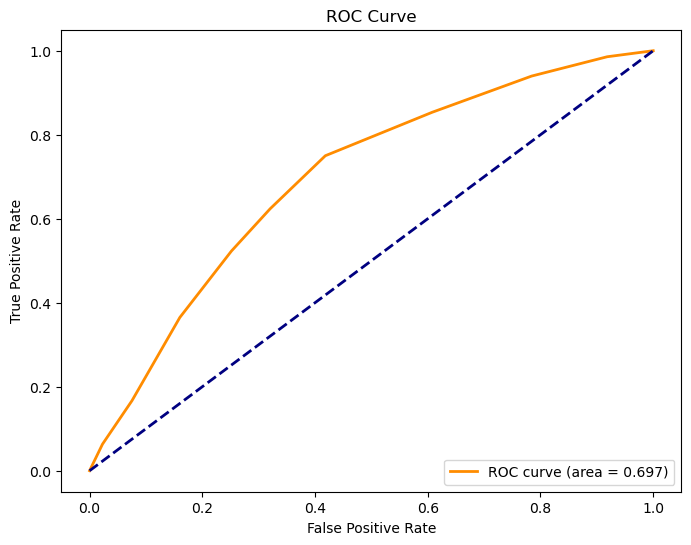

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
startup_df = pd.read_csv("modelling_df.csv", delimiter=',', header = 0, encoding = "ISO-8859-1",skipinitialspace=True)

startup_df.info()
# Data Preparation
X = pd.get_dummies(startup_df.drop(['status_binary'], axis=1))
y = startup_df['status_binary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Define the best parameters obtained from hyperparameter tuning
# Define the parameter grid for KNN
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

# Create a KNN classifier
knn = KNeighborsClassifier()

# Create a GridSearchCV object
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train_smote, y_train_smote)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best parameters to train the final KNN model
best_knn = KNeighborsClassifier(**best_params)
best_knn.fit(X_train_smote, y_train_smote)


# Create a KNN classifier with the best parameters
best_knn = KNeighborsClassifier(**best_params)

# Perform cross-validation
cv_scores = cross_val_score(best_knn, X_train_smote, y_train_smote, cv=10, scoring='roc_auc', n_jobs=-1)

# Create a DataFrame to display cross-validation results
cv_results = pd.DataFrame({
    'Fold': range(1, len(cv_scores) + 1),
    'AUC Score': cv_scores
})

# Print the table with mean and standard deviation
print("Cross-Validation Results:")
print(cv_results)
print("\nMean AUC: {:.3f}".format(cv_scores.mean()))
print("Standard Deviation: {:.3f}".format(cv_scores.std()))

# Train the final model on the entire training set
best_knn.fit(X_train_smote, y_train_smote)

# Predictions
y_pred = best_knn.predict(X_test)

# Print classification report with 3 decimal places
classification_report_result = classification_report(y_test, y_pred, digits=3)
print("\nClassification Report:\n", classification_report_result)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

# Plot ROC Curve
y_prob = best_knn.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.3f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


# WITHOUT SMOTE

Best Parameters: {'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}
Cross-Validation Results:
   Fold  AUC Score
0     1   0.729333
1     2   0.726112
2     3   0.753308
3     4   0.673495
4     5   0.733076
5     6   0.771435
6     7   0.709960
7     8   0.692888
8     9   0.694274
9    10   0.684633

Mean AUC: 0.717
Standard Deviation: 0.030

Classification Report:
               precision    recall  f1-score   support

           0      0.631     0.644     0.638       306
           1      0.681     0.670     0.675       348

    accuracy                          0.657       654
   macro avg      0.656     0.657     0.656       654
weighted avg      0.658     0.657     0.658       654


Confusion Matrix:
 [[197 109]
 [115 233]]


C:\Users\aa3-adebayo\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


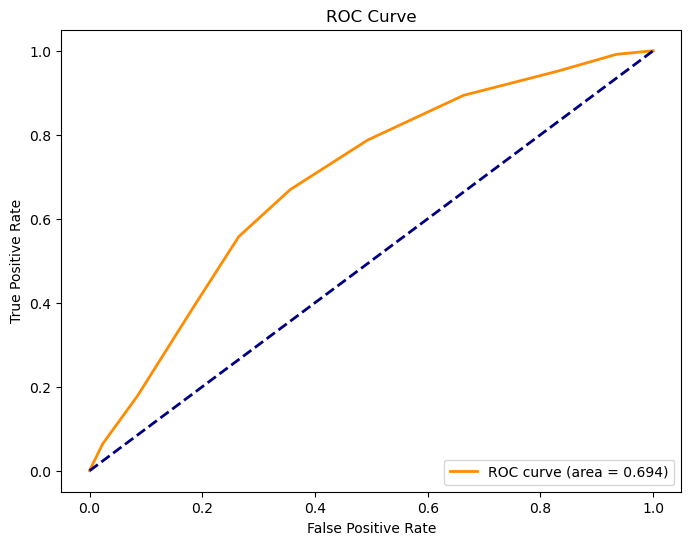

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Load the dataset
startup_df = pd.read_csv("modelling_df.csv", delimiter=',', header=0, encoding="ISO-8859-1", skipinitialspace=True)

# Data Preparation
X = pd.get_dummies(startup_df.drop(['status_binary'], axis=1))
y = startup_df['status_binary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for KNN
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

# Create a KNN classifier
knn = KNeighborsClassifier()

# Create a GridSearchCV object
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best parameters to train the final KNN model
best_knn = KNeighborsClassifier(**best_params)
best_knn.fit(X_train, y_train)

# Perform cross-validation
cv_scores = cross_val_score(best_knn, X_train, y_train, cv=10, scoring='roc_auc', n_jobs=-1)

# Create a DataFrame to display cross-validation results
cv_results = pd.DataFrame({
    'Fold': range(1, len(cv_scores) + 1),
    'AUC Score': cv_scores
})

# Print the table with mean and standard deviation
print("Cross-Validation Results:")
print(cv_results)
print("\nMean AUC: {:.3f}".format(cv_scores.mean()))
print("Standard Deviation: {:.3f}".format(cv_scores.std()))

# Predictions on the test set
y_pred = best_knn.predict(X_test)

# Print classification report with 3 decimal places
classification_report_result = classification_report(y_test, y_pred, digits=3)
print("\nClassification Report:\n", classification_report_result)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

# Plot ROC Curve
y_prob = best_knn.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.3f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()
